In [1]:
import sys
import os
import pandas as pd
from os import path

import pickle
from IPython.core.display import display, HTML, Markdown

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
from dev_wtp_io_utils import *
import gc
import nibabel as nib

nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"
test_train_df = pd.read_csv(train_test_markers_filepath)

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")


dataset_name = 'posterror_conditions'

from nilearn.decoding import DecoderRegressor, Decoder

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'
# HRF 2s

#get a PFC mask
#pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)
#get the masks we want




python initialized for apply_loocv_and_save


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


4


In [2]:
background_img = nlt.Brain_Data('/projects/sanlab/shared/spm12/canonical/MNI152_T1_1mm_brain.nii').to_nifti()

neurosynth_emo_reg_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/emotion regulation_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()
neurosynth_error_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/error_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()
accmask = nlt.Brain_Data(ml_data_folderpath + '/masks/harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz').threshold(binarize=True,upper=25).to_nifti()

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [3]:
from analyze_results import plot_stat_maps, get_bd, visualize_corr, get_ind_div_for_pes_combined, remove_selected_outliers, create_histogram

In [4]:
def run_full_pes_analysis(mask_label,mask_file,similarity_method,include_gender_breakdown=False):
    dataset_mask_label = mask_label
    relevant_mask = mask_file
    results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_" + dataset_mask_label +".pkl"
    brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'

    plotting.plot_img(
        relevant_mask,
        threshold='auto',
        cmap='autumn',
        bg_img=background_img)


    print(results_filepath)
    results=pickle.load(open(results_filepath,'rb'))

    print(np.mean(results[0]))

    PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
    #display(Markdown("### CorrectGoFollowingCorrectStop"))
    plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

    PostError_ns=results[3]['CorrectGoFollowingFailedStop']
    #display(Markdown("### CorrectGoFollowingFailedStop"))
    plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

    print(results_filepath,flush=True)

    print("plotting signatures")

    plot_stat_maps(PostError_ns,PostCorrect_ns)

    print("loading data")

    bd=get_bd(brain_data_filepath,PostError_ns,PostCorrect_ns,relevant_mask,similarity_method=similarity_method)

    create_histogram(bd)

    ind_div_combined = get_ind_div_for_pes_combined(bd,ml_data_folderpath)

    ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=False)

    for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
        display(Markdown("### " + neural_var))
        for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
            'cancer_promoting_FFQ','cancer_preventing_FFQ']:
            visualize_corr(neural_var,correlate,ind_div_combined)
            
    if include_gender_breakdown:
        for bs_f in ['Male','Female']:
            display(Markdown("### " + bs_f))
            for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
                display(Markdown("#### " + neural_var))
                for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
            'cancer_promoting_FFQ','cancer_preventing_FFQ']:
                    visualize_corr(neural_var,correlate,ind_div_combined.loc[ind_div_combined.birthsex_factor==bs_f,:])




In [5]:
#def run_full_pes_analysis(mask_label,mask_file,similarity_method,include_gender_breakdown=False):
mask_label = 'wholebrain'
mask_file = None
similarity_method = 'dot_product'
include_gender_breakdown=True

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
0.8888888888888888
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
plotting signatures


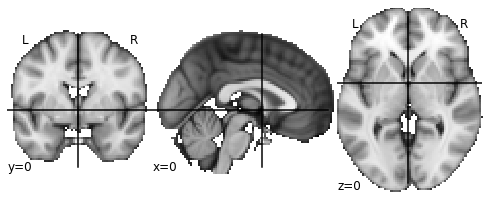

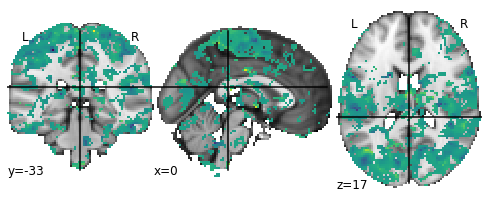

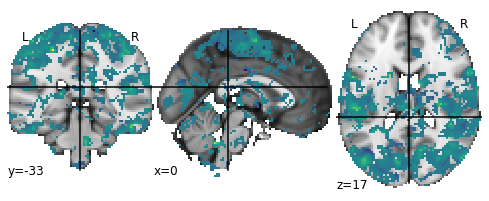

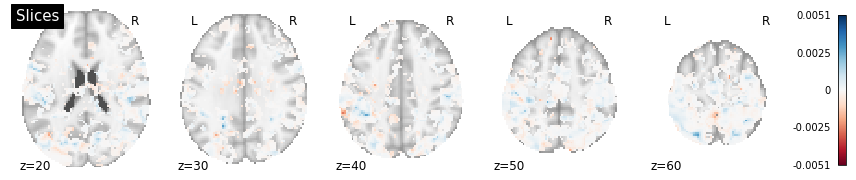

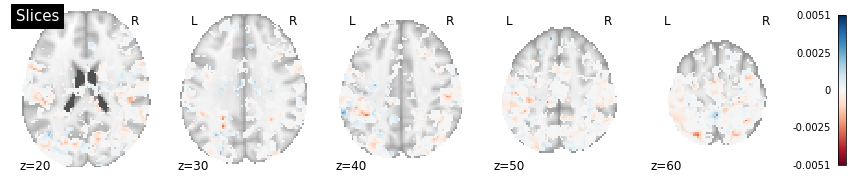

loading data
applying mask
getting similarity 1
getting similarity 2
creating histograms


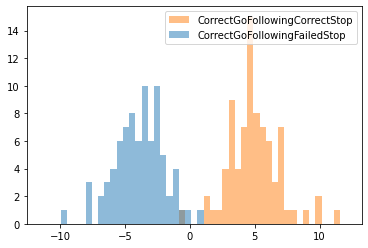

,PostError_similarity,PostCorrect_similarity
condition_label,,
CorrectGoFollowingCorrectStop,4.969145,-4.969145
CorrectGoFollowingFailedStop,-4.627246,4.627246


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562
66 , 60
0.00542666014271937 0.07267931990910022 -0.06725265976638085 0.07810598005181958
60 , 59
0.00470075519842794 0.07130647499379199 -0.06660571979536405 0.07600723019221993
59 , 59


66 , 65
65 , 65


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242
66 , 64
0.04934769830378225 0.1599415802788834 -0.11059388197510114 0.20928927858266563
64 , 64


66 , 65
65 , 64
64 , 64


1606.8330282933334 4748.65773553835 -3141.8247072450163 6355.490763831684


1606.8330282933334 4748.65773553835 -3141.8247072450163 6355.490763831684
30 , 27
1424.959268 3614.4890078448952 -2189.529739844895 5039.448275844896
27 , 27


30 , 28
28 , 27
27 , 27


4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285


4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285
81 , 79
4.872617978045989 5.008704169924817 -0.1360861918788281 9.881322147970806
79 , 78
4.8581368636266165 4.778723644000115 0.07941321962650161 9.636860507626732
78 , 77
4.843655749207244 4.697860067994084 0.14579568121316022 9.541515817201327
77 , 77


81 , 80
80 , 79
79 , 79


-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738


-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738
81 , 79
-3.7128407162505654 5.392578321489439 -9.105419037740004 1.6797376052388735
79 , 79


81 , 80
80 , 79
79 , 79


-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523


-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523
81 , 79
-4.872617978045989 5.008704169924817 -9.881322147970806 0.1360861918788281
79 , 78
-4.8581368636266165 4.778723644000115 -9.636860507626732 -0.07941321962650161
78 , 77
-4.843655749207244 4.697860067994084 -9.541515817201327 -0.14579568121316022
77 , 77


81 , 80
80 , 79
79 , 79


3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806


3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806
81 , 79
3.7128407162505654 5.392578321489439 -1.6797376052388735 9.105419037740004
79 , 79


81 , 80
80 , 79
79 , 79


In [6]:
dataset_mask_label = mask_label
relevant_mask = mask_file
results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_" + dataset_mask_label +".pkl"
brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'

plotting.plot_img(
    relevant_mask,
    threshold='auto',
    cmap='autumn',
    bg_img=background_img)


print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
#display(Markdown("### CorrectGoFollowingCorrectStop"))
plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
#display(Markdown("### CorrectGoFollowingFailedStop"))
plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

print(results_filepath,flush=True)

print("plotting signatures")

plot_stat_maps(PostError_ns,PostCorrect_ns)

print("loading data")

bd=get_bd(brain_data_filepath,PostError_ns,PostCorrect_ns,relevant_mask,similarity_method=similarity_method)

create_histogram(bd)

ind_div_combined = get_ind_div_for_pes_combined(bd,ml_data_folderpath)

ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=False)



In [7]:
ind_div_combined = get_ind_div_for_pes_combined(bd,ml_data_folderpath)

In [8]:
from nilearn import surface
from nilearn import datasets
from nilearn import plotting
from matplotlib import pyplot
from scipy.stats import pearsonr
import pickle
from IPython.core.display import display, HTML, Markdown
from nilearn import plotting
from nilearn.masking import compute_brain_mask
import nltools as nlt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
ind_div_combined.loc[60:70,['PE_trials_PostError_similarity','RTFS_factor_1','RTFS_factor_2']]

,PE_trials_PostError_similarity,RTFS_factor_1,RTFS_factor_2
60,-4.398585,2.166667,3.875000
61,-9.792537,NaN,NaN
62,-3.712841,3.142857,4.750000
63,-3.838151,4.083333,4.375000
64,-4.004531,2.166667,2.541667
65,-0.851895,3.083333,2.416667
66,-5.275454,2.416667,5.666667
67,-3.331858,2.416667,1.958333
68,-3.372749,5.500000,5.238095
69,-6.654625,2.818182,3.739130


In [10]:
def visualize_corr(neural_var,correlate,data):
    display(HTML(correlate))
    #nan_rows = np.isnan(data[correlate])
    nan_rows = np.isnan(data[correlate]) | np.isnan(data[neural_var])
    cor2way_df = data.loc[nan_rows==False,]
    print(len(cor2way_df.index))
    print(cor2way_df.index)
    pearson_result = pearsonr(cor2way_df[neural_var],cor2way_df[correlate])
    display(HTML("r=" + format(pearson_result[0],".2f") +"; p-value=" + format(pearson_result[1],".4f")))
    cplot = pyplot.scatter(cor2way_df[neural_var],cor2way_df[correlate])
    cplot.axes.set_xlabel(neural_var)
    cplot.axes.set_ylabel(correlate)
    pyplot.show()

In [11]:
data_by_ppt_name = "data_by_ppt_2021_12_29.csv"

#def get_ind_div_for_pes_combined(bd,ml_data_folderpath):

pes_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing.csv",index_col=0)
pepc_contrast_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing_simple_approach.csv",index_col=0)

individual_differences = pd.read_csv(ml_data_folderpath + "/"+ data_by_ppt_name)
individual_differences = individual_differences.rename(columns={'SID':'subject'})
individual_differences['wave']=1
#individual_differences['wave'] = individual_differences['wave'].astype(object) # for compatibility with the wave column in the dataset

individual_differences = pd.merge(individual_differences,pes_data,how='outer',left_on='subject',right_on='subid')
individual_differences = pd.merge(individual_differences,pepc_contrast_data,how='outer',left_on='subject',right_on='subid')

subject_pc_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop',['subject','PostError_similarity','PostCorrect_similarity']]
subject_pe_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop',['subject','PostError_similarity','PostCorrect_similarity']]

subject_pc_neural_performance.columns = ['PC_trials_' + col for col in subject_pc_neural_performance.columns]
subject_pe_neural_performance.columns = ['PE_trials_' + col for col in subject_pe_neural_performance.columns]
subject_neural_performance = subject_pc_neural_performance.merge(subject_pe_neural_performance,left_on='PC_trials_subject',right_on='PE_trials_subject',how='outer')
subject_neural_performance =subject_neural_performance.rename(columns = {'PC_trials_subject':'subject'})

ind_div_combined = subject_neural_performance.merge(individual_differences,left_on='subject',right_on='subject',how='left')

#remove outliers

#return(ind_div_combined)

In [12]:
ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=False)

0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562
66 , 60
0.00542666014271937 0.07267931990910022 -0.06725265976638085 0.07810598005181958
60 , 59
0.00470075519842794 0.07130647499379199 -0.06660571979536405 0.07600723019221993
59 , 59


66 , 65
65 , 65


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242
66 , 64
0.04934769830378225 0.1599415802788834 -0.11059388197510114 0.20928927858266563
64 , 64


66 , 65
65 , 64
64 , 64


1606.8330282933334 4748.65773553835 -3141.8247072450163 6355.490763831684


1606.8330282933334 4748.65773553835 -3141.8247072450163 6355.490763831684
30 , 27
1424.959268 3614.4890078448952 -2189.529739844895 5039.448275844896
27 , 27


30 , 28
28 , 27
27 , 27


4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285


4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285
81 , 79
4.872617978045989 5.008704169924817 -0.1360861918788281 9.881322147970806
79 , 78
4.8581368636266165 4.778723644000115 0.07941321962650161 9.636860507626732
78 , 77
4.843655749207244 4.697860067994084 0.14579568121316022 9.541515817201327
77 , 77


81 , 80
80 , 79
79 , 79


-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738


-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738
81 , 79
-3.7128407162505654 5.392578321489439 -9.105419037740004 1.6797376052388735
79 , 79


81 , 80
80 , 79
79 , 79


-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523


-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523
81 , 79
-4.872617978045989 5.008704169924817 -9.881322147970806 0.1360861918788281
79 , 78
-4.8581368636266165 4.778723644000115 -9.636860507626732 -0.07941321962650161
78 , 77
-4.843655749207244 4.697860067994084 -9.541515817201327 -0.14579568121316022
77 , 77


81 , 80
80 , 79
79 , 79


3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806


3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806
81 , 79
3.7128407162505654 5.392578321489439 -1.6797376052388735 9.105419037740004
79 , 79


81 , 80
80 , 79
79 , 79


In [14]:
neural_var = 'PE_trials_PostError_similarity'

In [15]:
np.isnan(ind_div_combined['RTFS_factor_1'])

0      True
1      True
2      True
3      True
4     False
      ...  
76     True
77    False
78    False
79    False
80     True
Name: RTFS_factor_1, Length: 81, dtype: bool

### PE_trials_PostError_similarity

50
Int64Index([ 4,  8,  9, 12, 15, 17, 25, 27, 30, 32, 33, 34, 36, 37, 38, 39, 40,
            41, 42, 43, 44, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60,
            62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 77, 78, 79],
           dtype='int64')


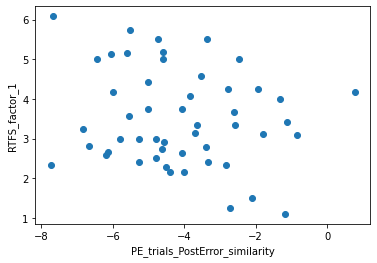

In [16]:


display(Markdown("### " + neural_var))
#    for correlate in ['RTFS_factor_1','RTFS_factor_2']:
visualize_corr(neural_var,'RTFS_factor_1',ind_div_combined)

50
Int64Index([ 4,  8,  9, 12, 15, 17, 25, 27, 30, 32, 33, 34, 35, 36, 37, 38, 39,
            40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58,
            60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 77, 78, 79],
           dtype='int64')


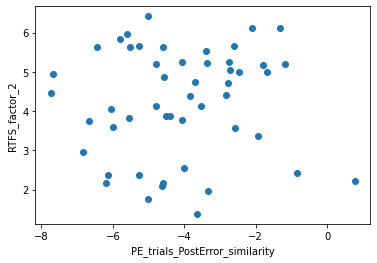

In [11]:
visualize_corr(neural_var,'RTFS_factor_2',ind_div_combined)

The reason this doesn't work out is because that point at PE_trials_PostError_similarity=-10 has a NA value at RTFS_factor_1.

I think we're doing the right thing to exclude on a pairwise basis, but the question is why it's missing at factor 1.

In [12]:
ind_div_combined.loc[61]

subject                                DEV105
PC_trials_PostError_similarity        3.57903
PC_trials_PostCorrect_similarity     -3.57903
PE_trials_subject                      DEV105
PE_trials_PostError_similarity       -9.79254
                                      ...    
pes_mean_limited                    0.0862729
subid_y                                DEV105
PECG_mean                            0.798814
PCCG_mean                            0.762397
PostErrorSlowW1                     0.0364166
Name: 61, Length: 138, dtype: object

Need to go back to the raw data for RTFS scales...

In [13]:
ind_div_combined = get_ind_div_for_pes_combined(bd,ml_data_folderpath)

0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562
66 , 60
0.00542666014271937 0.07267931990910022 -0.06725265976638085 0.07810598005181958
60 , 59
0.00470075519842794 0.07130647499379199 -0.06660571979536405 0.07600723019221993
59 , 59


66 , 65
65 , 65


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242
66 , 64
0.04934769830378225 0.1599415802788834 -0.11059388197510114 0.20928927858266563
64 , 64


66 , 65
65 , 64
64 , 64


1606.8330282933334 4748.65773553835 -3141.8247072450163 6355.490763831684


1606.8330282933334 4748.65773553835 -3141.8247072450163 6355.490763831684
30 , 27
1424.959268 3614.4890078448952 -2189.529739844895 5039.448275844896
27 , 27


30 , 28
28 , 27
27 , 27


4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285


4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285
81 , 79
4.872617978045989 5.008704169924817 -0.1360861918788281 9.881322147970806
79 , 78
4.8581368636266165 4.778723644000115 0.07941321962650161 9.636860507626732
78 , 77
4.843655749207244 4.697860067994084 0.14579568121316022 9.541515817201327
77 , 77


81 , 80
80 , 79
79 , 79


-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738


-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738
81 , 79
-3.7128407162505654 5.392578321489439 -9.105419037740004 1.6797376052388735
79 , 79


81 , 80
80 , 79
79 , 79


-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523


-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523
81 , 79
-4.872617978045989 5.008704169924817 -9.881322147970806 0.1360861918788281
79 , 78
-4.8581368636266165 4.778723644000115 -9.636860507626732 -0.07941321962650161
78 , 77
-4.843655749207244 4.697860067994084 -9.541515817201327 -0.14579568121316022
77 , 77


81 , 80
80 , 79
79 , 79


3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806


3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806
81 , 79
3.7128407162505654 5.392578321489439 -1.6797376052388735 9.105419037740004
79 , 79


81 , 80
80 , 79
79 , 79


In [14]:
pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")[['RTFS_factor_1','RTFS_factor_2']]

,RTFS_factor_1,RTFS_factor_2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195,2.666667,2.368421
196,5.000000,2.166667
197,NaN,NaN
198,1.000000,1.083333


In [15]:
self_report_data = pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")

In [16]:
self_report_data.loc[60:70,['RTFS_factor_1','RTFS_factor_2']]

,RTFS_factor_1,RTFS_factor_2
60,2.636364,3.764706
61,5.000000,4.800000
62,3.666667,5.666667
63,3.083333,3.875000
64,1.750000,1.291667
65,1.000000,1.083333
66,4.250000,3.375000
67,2.000000,5.260870
68,4.083333,2.333333
69,3.583333,3.833333


In [17]:
differentially_nan = np.isnan(self_report_data.RTFS_factor_1) ^ np.isnan(self_report_data.RTFS_factor_2)

In [18]:
self_report_data.loc[differentially_nan,['RTFS_factor_1','RTFS_factor_2']]

,RTFS_factor_1,RTFS_factor_2
87,NaN,3.222222
100,NaN,2.777778
102,NaN,2.777778
111,NaN,4.923077
129,NaN,4.166667
158,5.50,NaN
191,3.75,NaN


So how does that file get generated? Raw qualtrics record appears to be:

I checked the data--it just so happens this subject really does have a lot of missing data.